In [189]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
import pickle
import os
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone


data=pd.read_csv('./data_dummified.csv')

In [190]:
data.shape

(84432, 157)

In [191]:
X = data.copy()

In [192]:
## creating target variable and dropping from data set

Y = X['target']
X = X.drop('target', axis = 1)

In [193]:
num_lst =['time_in_hospital',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'number_diagnoses']

In [194]:
X_new = X.copy()
X_new[num_lst] = scaler.transform(X_new[num_lst])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


In [199]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, shuffle = True, stratify = Y, random_state = 0)

In [9]:
scalerfile = 'scaler.sav'
scaler = pickle.load(open(scalerfile, 'rb'))

In [201]:
X_train[num_lst] = scaler.transform(X_train[num_lst])
X_test[num_lst] = scaler.transform(X_test[num_lst])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.7/site-packages/ip

In [202]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(X_new.shape)
X_train.dtypes

(84432, 156)
(59102, 156)
(25330, 156)
(84432, 156)


time_in_hospital                                      float64
num_lab_procedures                                    float64
num_procedures                                        float64
num_medications                                       float64
number_outpatient                                     float64
number_emergency                                      float64
number_inpatient                                      float64
number_diagnoses                                      float64
self_pay                                                int64
medicaid/medicare                                       int64
coverByInsurance                                        int64
clustering3                                             int64
clustering4                                             int64
clustering2                                             int64
race_Asian                                              int64
race_Caucasian                                          int64
race_His

In [22]:
logit = LogisticRegression(C = 1e5, class_weight = 'balanced')

In [15]:
logit.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)>

In [26]:
logit.fit(X_train, Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [203]:
print(roc_auc_score(Y_train, logit.predict(X_train)))
print(roc_auc_score(Y_test, logit.predict(X_test)))

ValueError: X has 156 features per sample; expecting 125

In [204]:
logit.predict(X_test)

ValueError: X has 156 features per sample; expecting 125

In [37]:
C_ = [1, 0.1 , 0.01]  # OOB score will warning if too few trees
train_auc = []
test_auc = []

for c  in C_:
        logit.set_params(C = c, class_weight = 'balanced', penalty = 'l1')
        logit.fit(X_train, Y_train)
        train_auc.append(roc_auc_score(Y_train, logit.predict(X_train)))
        test_auc.append(roc_auc_score(Y_test, logit.predict(X_test)))
        
        

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


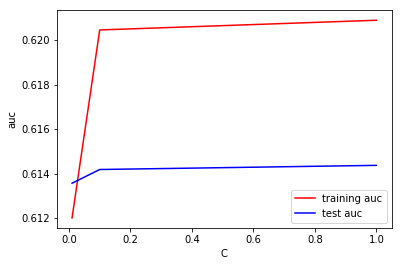

In [38]:
import matplotlib.pyplot as plt
plt.plot(C_, train_auc, c='red', label='training auc')
plt.plot(C_, test_auc, c='blue', label='test auc')
plt.ylabel('auc')
plt.xlabel('C')
plt.legend()
plt.show()

In [44]:
logit.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=0.01, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)>

In [43]:
print("auc train score: ", roc_auc_score(Y_train, logit.predict(X_train)))
print("auc test score: ",roc_auc_score(Y_test, logit.predict(X_test)))
print("recall train score: ",recall_score(Y_train, logit.predict(X_train)))
print("recall test score: ",recall_score(Y_test, logit.predict(X_test)))
print("precision train score: ", precision_score(Y_train, logit.predict(X_train)))
print("precision test score: ",precision_score(Y_test, logit.predict(X_test)))
print("accuracy train score: ",accuracy_score(Y_train, logit.predict(X_train)))
print("accuracy test score: ",accuracy_score(Y_test, logit.predict(X_test)))
print(confusion_matrix(Y_test, logit.predict(X_test)))

auc train score:  0.6120085832419102
auc test score:  0.61356695917191
recall train score:  0.524368499257058
recall test score:  0.5306759098786828
precision train score:  0.18323900514045383
precision test score:  0.18348513902205177
accuracy train score:  0.6796893506141924
accuracy test score:  0.6775759968416897
[[15632  6813]
 [ 1354  1531]]


In [45]:
new_data=pd.read_csv('./Data_final_clean.csv')

In [205]:
new_data.shape

(84432, 126)

In [50]:
## creating target variable and dropping from data set

Y_ = new_data['target']
X_ = new_data.drop('target', axis = 1)

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X_, Y_, test_size=0.30, shuffle = True, stratify = Y, random_state = 0)

In [52]:
X_train[num_lst] = scaler.transform(X_train[num_lst])
X_test[num_lst] = scaler.transform(X_test[num_lst])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.7/site-packages/ip

In [68]:
logit_ = LogisticRegression(C = .005, class_weight = 'balanced')

In [69]:
logit_.fit(X_train, Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.005, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [81]:
C_ = [0.001, 0.003, 0.005, 0.007, 0.009, 0.01]  # OOB score will warning if too few trees
train_auc = []
test_auc = []

for c  in C_:
        logit_.set_params(C = c, class_weight = 'balanced', penalty = 'l2')
        logit_.fit(X_train, Y_train)
        train_auc.append(roc_auc_score(Y_train, logit_.predict(X_train)))
        test_auc.append(roc_auc_score(Y_test, logit_.predict(X_test)))
        

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

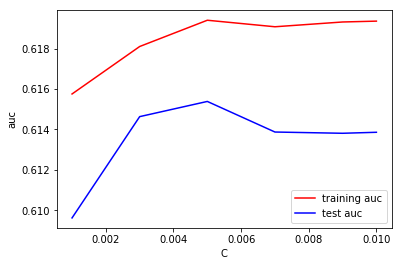

In [82]:
import matplotlib.pyplot as plt
plt.plot(C_, train_auc, c='red', label='training auc')
plt.plot(C_, test_auc, c='blue', label='test auc')
plt.ylabel('auc')
plt.xlabel('C')
plt.legend()
plt.show()

In [85]:
logit_ = LogisticRegression(C = .005, class_weight = 'balanced', penalty = 'l2')
logit_.fit(X_train, Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.005, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [86]:
print("auc train score: ", roc_auc_score(Y_train, logit_.predict(X_train)))
print("auc test score: ",roc_auc_score(Y_test, logit_.predict(X_test)))
print("recall train score: ",recall_score(Y_train, logit_.predict(X_train)))
print("recall test score: ",recall_score(Y_test, logit_.predict(X_test)))
print("precision train score: ", precision_score(Y_train, logit_.predict(X_train)))
print("precision test score: ",precision_score(Y_test, logit_.predict(X_test)))
print("accuracy train score: ",accuracy_score(Y_train, logit_.predict(X_train)))
print("accuracy test score: ",accuracy_score(Y_test, logit_.predict(X_test)))
print(confusion_matrix(Y_test, logit_.predict(X_test)))

auc train score:  0.6194127472354872
auc test score:  0.6153899016776229
recall train score:  0.5641901931649331
recall test score:  0.5577123050259966
precision train score:  0.18222392858856842
precision test score:  0.17983681681010394
accuracy train score:  0.6620588135765287
accuracy test score:  0.6599289380181603
[[15107  7338]
 [ 1276  1609]]


In [89]:
sgd = SGDClassifier(loss='log', shuffle=False)
sgd

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=False, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [90]:
sgd.fit(X_train, Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=False, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [92]:
print("auc train score: ", roc_auc_score(Y_train, sgd.predict(X_train)))
print("auc test score: ",roc_auc_score(Y_test, sgd.predict(X_test)))
print("recall train score: ",recall_score(Y_train, sgd.predict(X_train)))
print("recall test score: ",recall_score(Y_test, sgd.predict(X_test)))
print("precision train score: ", precision_score(Y_train, sgd.predict(X_train)))
print("precision test score: ",precision_score(Y_test, sgd.predict(X_test)))
print("accuracy train score: ",accuracy_score(Y_train, sgd.predict(X_train)))
print("accuracy test score: ",accuracy_score(Y_test, sgd.predict(X_test)))
print(confusion_matrix(Y_test, sgd.predict(X_test)))

auc train score:  0.5593904033653863
auc test score:  0.5541113208370316
recall train score:  0.21812778603268945
recall test score:  0.2093587521663778
precision train score:  0.22005696297406685
precision test score:  0.21016005567153792
accuracy train score:  0.822933234069913
accuracy test score:  0.8203316225819187
[[20175  2270]
 [ 2281   604]]


In [102]:
## running random search for best params
cv = StratifiedKFold(n_splits=3, shuffle = True, random_state = 0)
penalty = ['none', 'l2', 'l1']
max_iter = range(100, 500, 100)
alpha = [0.001, 0.005, 0.01, 0.05, 0.1 , 0.5]
rand_search_params = {'penalty': penalty,
                     'max_iter': max_iter,
                     'alpha': alpha}

rand_sgd = RandomizedSearchCV(estimator = sgd, param_distributions=rand_search_params, cv =cv, scoring = 'recall', random_state = 0, n_iter = 20, n_jobs = -1 )

rand_sgd.fit(X_train, Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
          error_score='raise-deprecating',
          estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=False, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'penalty': ['none', 'l2', 'l1'], 'max_iter': range(100, 500, 100), 'alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring='recall', verbose=0)

In [103]:
best_params = rand_sgd.best_params_

In [104]:
best_params

{'penalty': 'none', 'max_iter': 100, 'alpha': 0.1}

In [107]:
sgd_ = SGDClassifier(loss='log', shuffle=False, fit_intercept = False)
sgd_.set_params(**best_params)
sgd_.fit(X_train, Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=False,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='none',
       power_t=0.5, random_state=None, shuffle=False, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [108]:
print("auc train score: ", roc_auc_score(Y_train, sgd_.predict(X_train)))
print("auc test score: ",roc_auc_score(Y_test, sgd_.predict(X_test)))
print("recall train score: ",recall_score(Y_train, sgd_.predict(X_train)))
print("recall test score: ",recall_score(Y_test, sgd_.predict(X_test)))
print("precision train score: ", precision_score(Y_train, sgd_.predict(X_train)))
print("precision test score: ",precision_score(Y_test, sgd_.predict(X_test)))
print("accuracy train score: ",accuracy_score(Y_train, sgd_.predict(X_train)))
print("accuracy test score: ",accuracy_score(Y_test, sgd_.predict(X_test)))
print(confusion_matrix(Y_test, sgd_.predict(X_test)))

auc train score:  0.5191939785207867
auc test score:  0.5126159342710643
recall train score:  0.0487369985141159
recall test score:  0.035701906412478335
precision train score:  0.37701149425287356
precision test score:  0.3047337278106509
accuracy train score:  0.882508206152076
accuracy test score:  0.8808922226608764
[[22210   235]
 [ 2782   103]]


In [178]:
X_new.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,self_pay,medicaid/medicare,...,discharge_id_5,discharge_id_6,discharge_id_Other,admission_id_17,admission_id_2,admission_id_4,admission_id_5,admission_id_6,admission_id_7,admission_id_Other
0,1.894870,0.106974,-0.195521,0.863239,-0.290279,-0.219506,1.106734,0.821978,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0.208656,-0.198856,1.566734,0.125710,-0.290279,-0.219506,-0.503423,0.821978,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.465830,0.208917,-0.782940,-0.365975,-0.290279,-0.219506,3.521970,0.821978,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.208656,0.922521,-0.782940,-0.243054,-0.290279,-0.219506,-0.503423,0.821978,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1.894870,1.687097,-0.195521,0.863239,-0.290279,-0.219506,-0.503423,0.821978,0,1,...,0,1,0,0,0,0,0,0,1,0


In [180]:
predictions = logit.predict_proba(X_new)[:,1]

ValueError: X has 156 features per sample; expecting 125

In [ ]:
X_new["predict_proba"] = predictions
X_new["predict_proba"] = X_new["predict_proba"].apply(lambda x: x*100).astype(int)
X_new.head()